<a href="https://colab.research.google.com/github/chitranshi135/Youtube_Spotify_DAV_Project/blob/main/DAV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv('Spotify_Youtube.csv')


In [7]:
#remove the rows with missing values
df = df.dropna()

#remove the unnamed column
df = df.drop(['Unnamed: 0'], axis=1)
df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


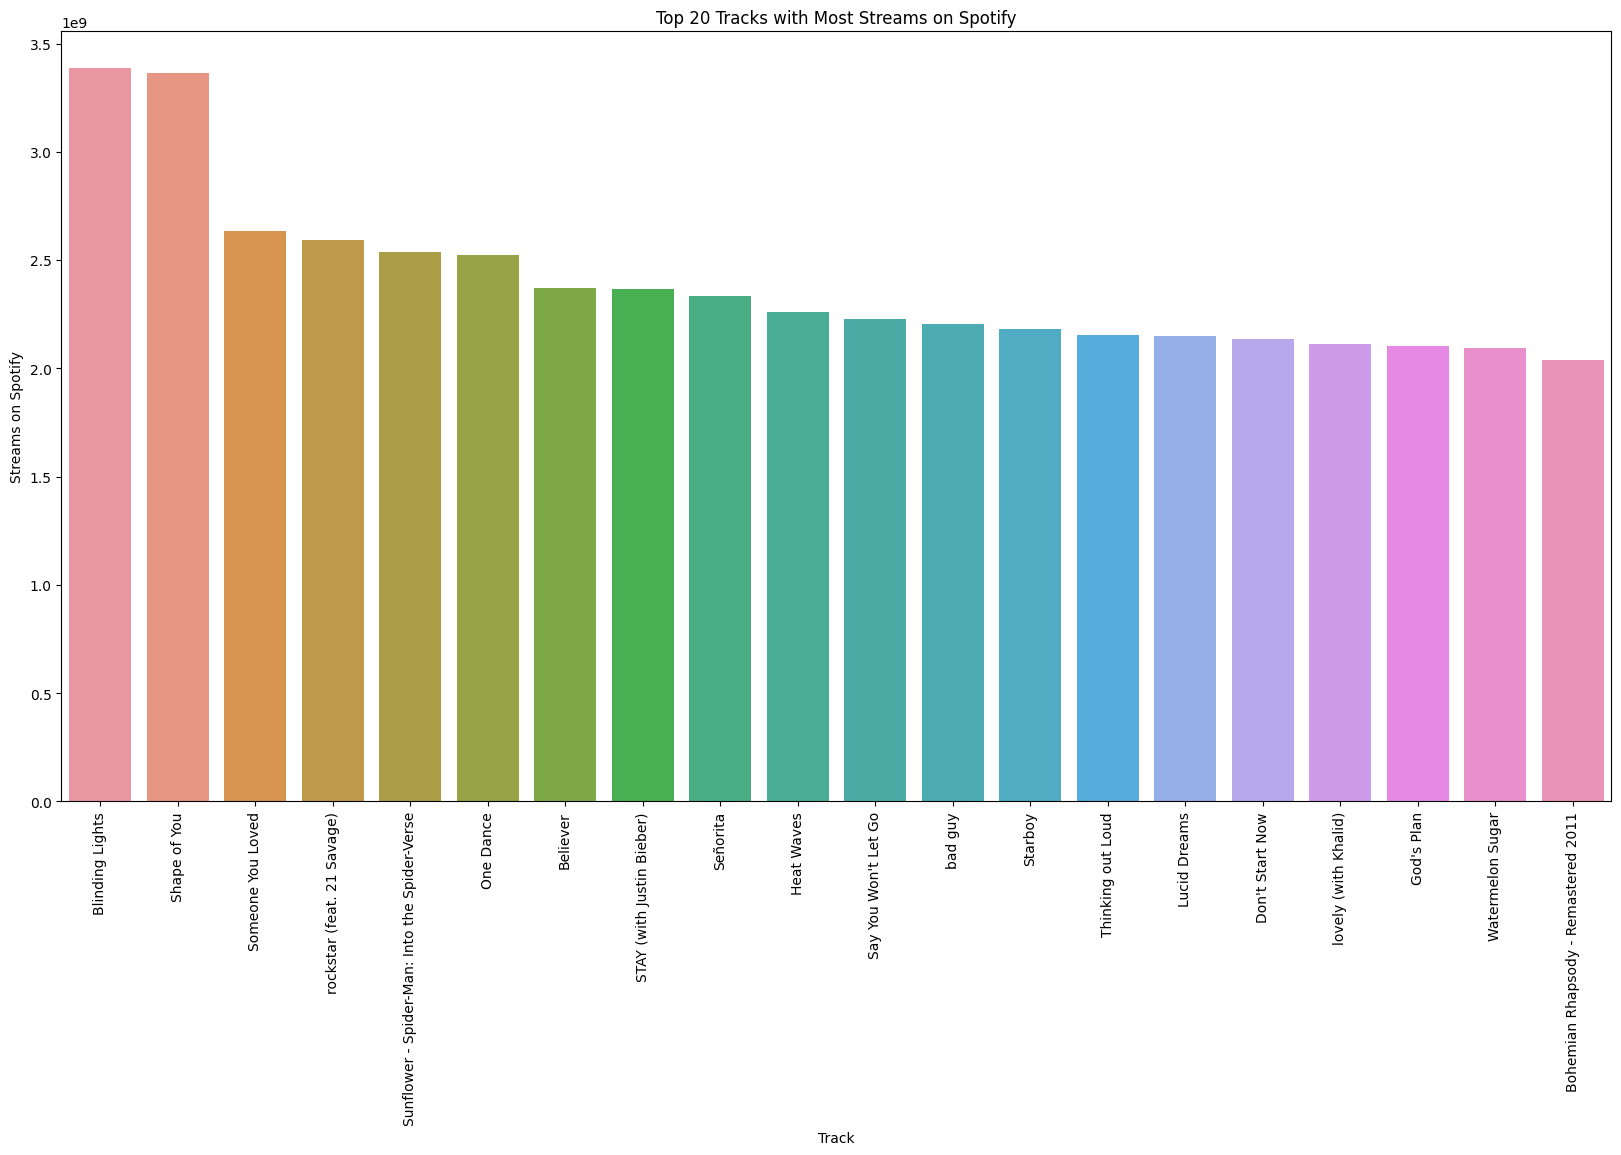

In [8]:
top_20_songs_on_spotify = df[['Track', 'Stream']]
top_20_songs_on_spotify = top_20_songs_on_spotify.drop_duplicates(subset=['Track'], keep='first')

#top 20 tracks with most streams
top_20_songs_on_spotify = top_20_songs_on_spotify.sort_values(by=['Stream'], ascending=False)
top_20_songs_on_spotify = top_20_songs_on_spotify.head(20)

#plot the top 20 tracks with most streams
plt.figure(figsize=(20,10))
sns.barplot(x='Track', y='Stream', data = top_20_songs_on_spotify)
plt.xticks(rotation=90)
plt.ylabel('Streams on Spotify')
plt.title('Top 20 Tracks with Most Streams on Spotify')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


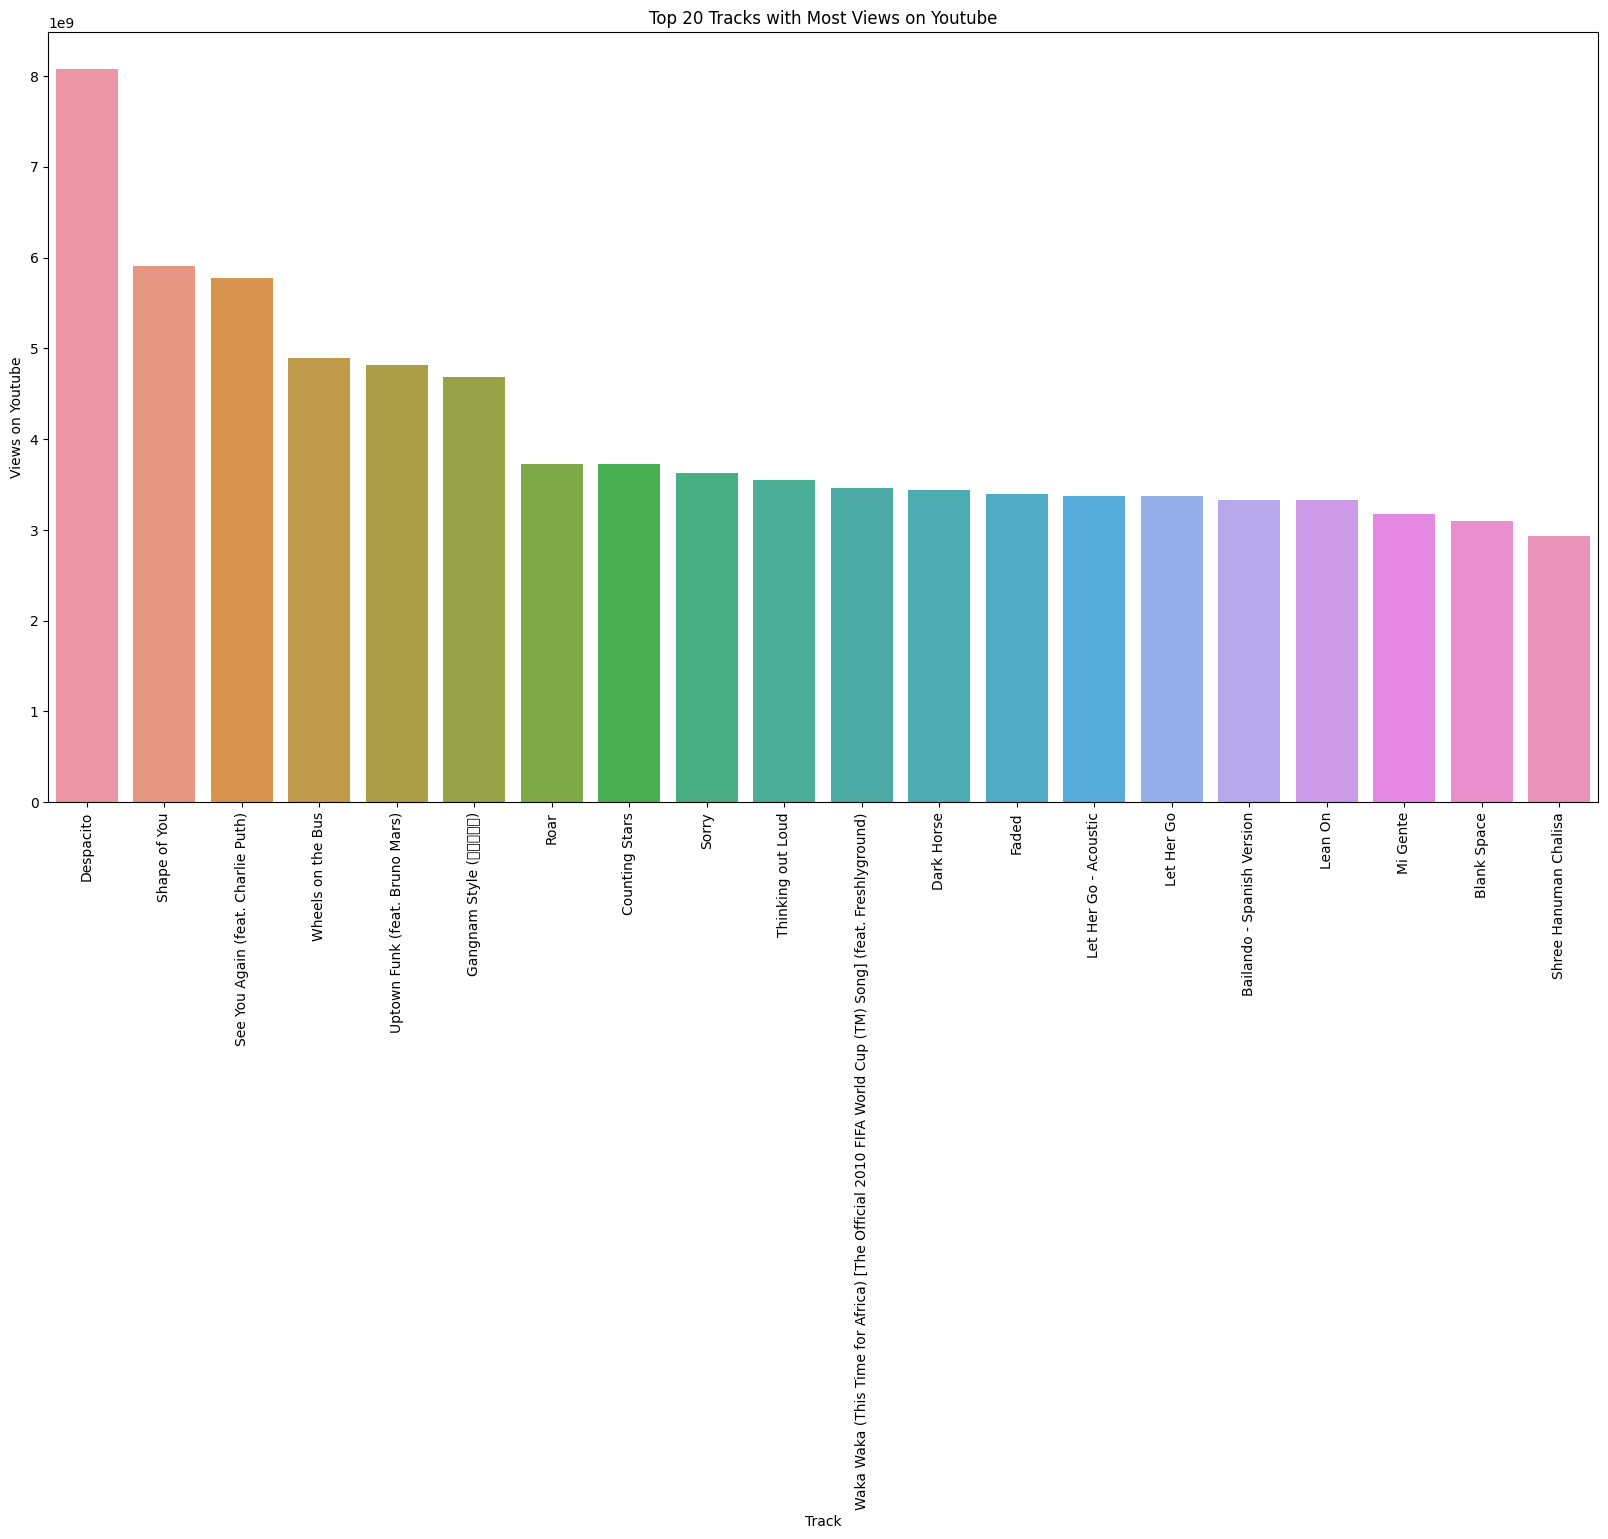

In [9]:
top_20_songs_on_youtube = df[['Track', 'Views']]
top_20_songs_on_youtube = top_20_songs_on_youtube.drop_duplicates(subset=['Track'], keep='first')

#top 20 tracks with most views
top_20_songs_on_youtube = top_20_songs_on_youtube.sort_values(by=['Views'], ascending=False)
top_20_songs_on_youtube = top_20_songs_on_youtube.head(20)

#plot the top 20 tracks with most views
plt.figure(figsize=(20,10))
sns.barplot(x='Track', y='Views', data = top_20_songs_on_youtube)
plt.xticks(rotation=90)
plt.ylabel('Views on Youtube')
plt.title('Top 20 Tracks with Most Views on Youtube')
plt.show()

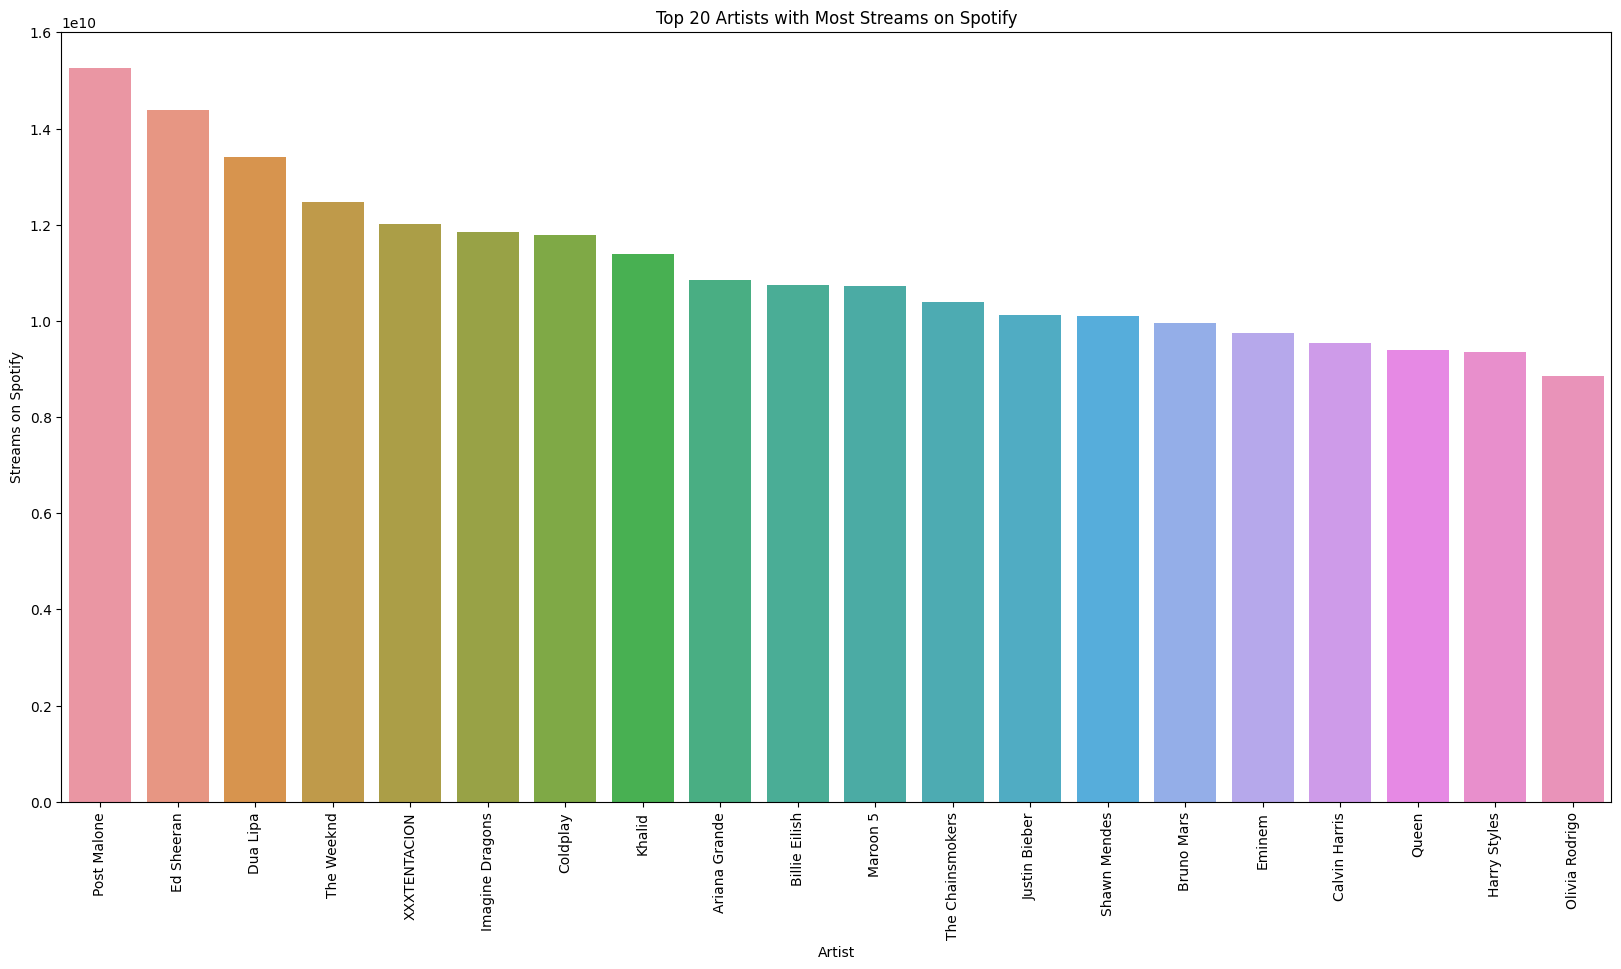

In [10]:
top_20_artists_on_spotify = df[['Artist', 'Stream']].groupby('Artist').sum()
top_20_artists_on_spotify = top_20_artists_on_spotify.sort_values(by=['Stream'], ascending=False)
top_20_artists_on_spotify = top_20_artists_on_spotify.head(20)

#plot the top 20 artists with most streams
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_artists_on_spotify.index, y='Stream', data = top_20_artists_on_spotify)
plt.xticks(rotation=90)
plt.ylabel('Streams on Spotify')
plt.title('Top 20 Artists with Most Streams on Spotify')
plt.show()


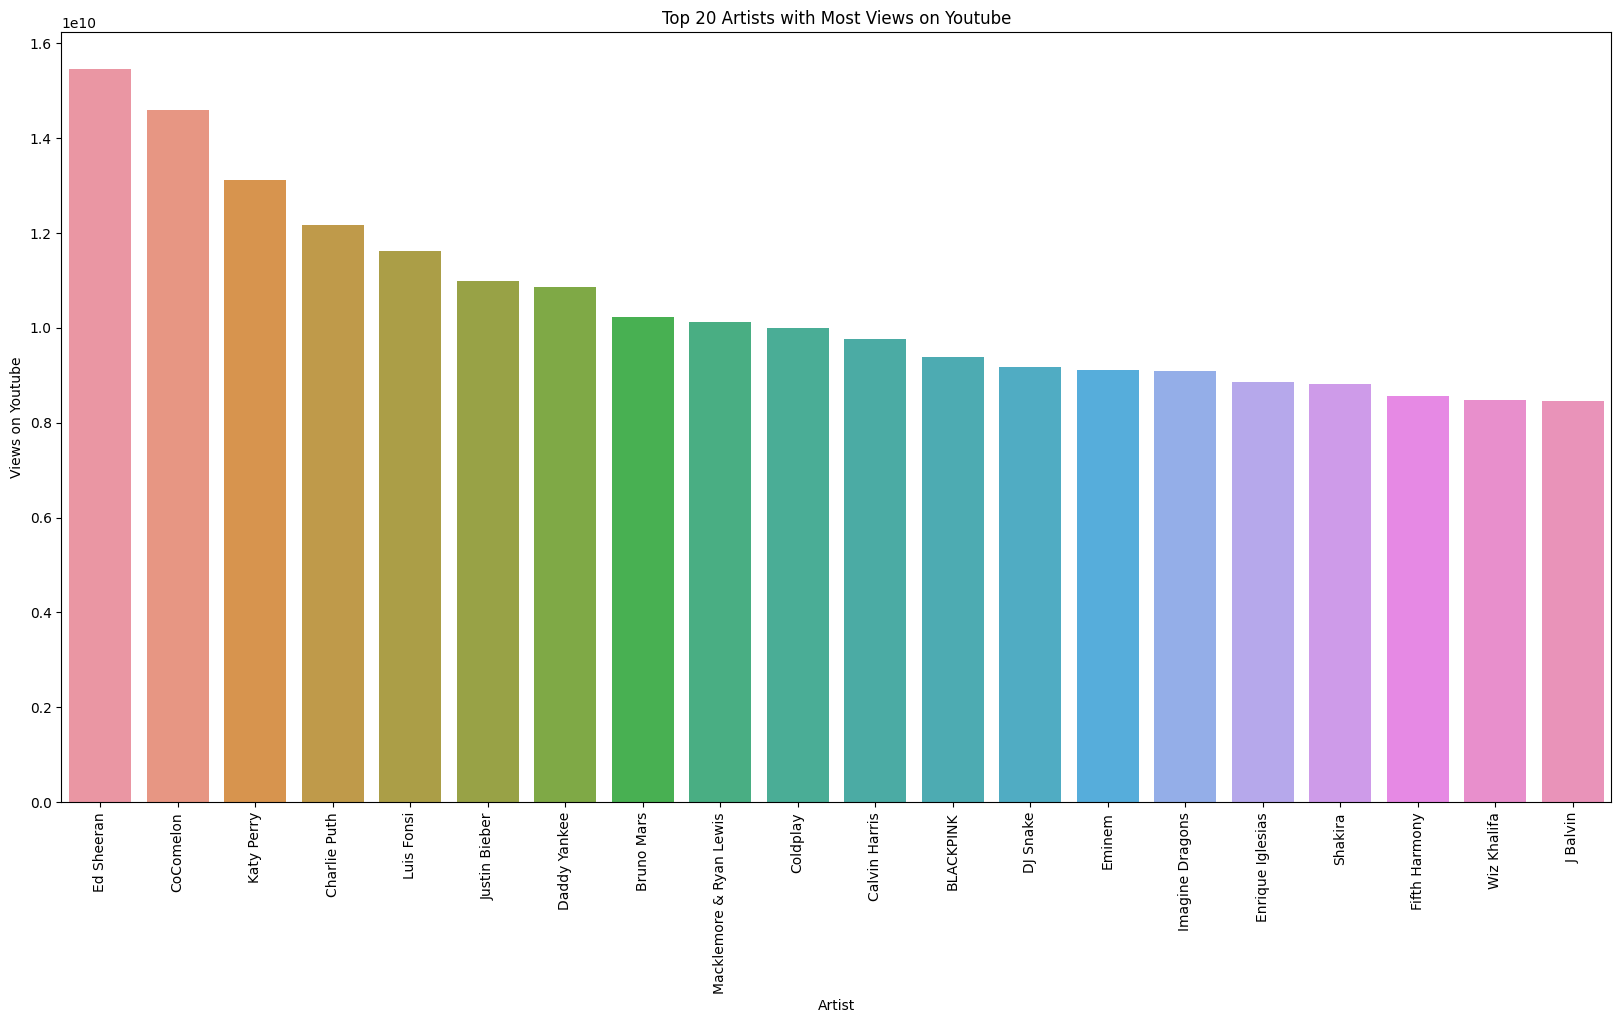

In [11]:
top_20_artists_on_youtube = df[['Artist', 'Views']].groupby('Artist').sum()
top_20_artists_on_youtube = top_20_artists_on_youtube.sort_values(by=['Views'], ascending=False)
top_20_artists_on_youtube = top_20_artists_on_youtube.head(20)

#plot the top 20 artists with most views
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_artists_on_youtube.index, y='Views', data = top_20_artists_on_youtube)
plt.xticks(rotation=90)
plt.ylabel('Views on Youtube')
plt.title('Top 20 Artists with Most Views on Youtube')
plt.show()

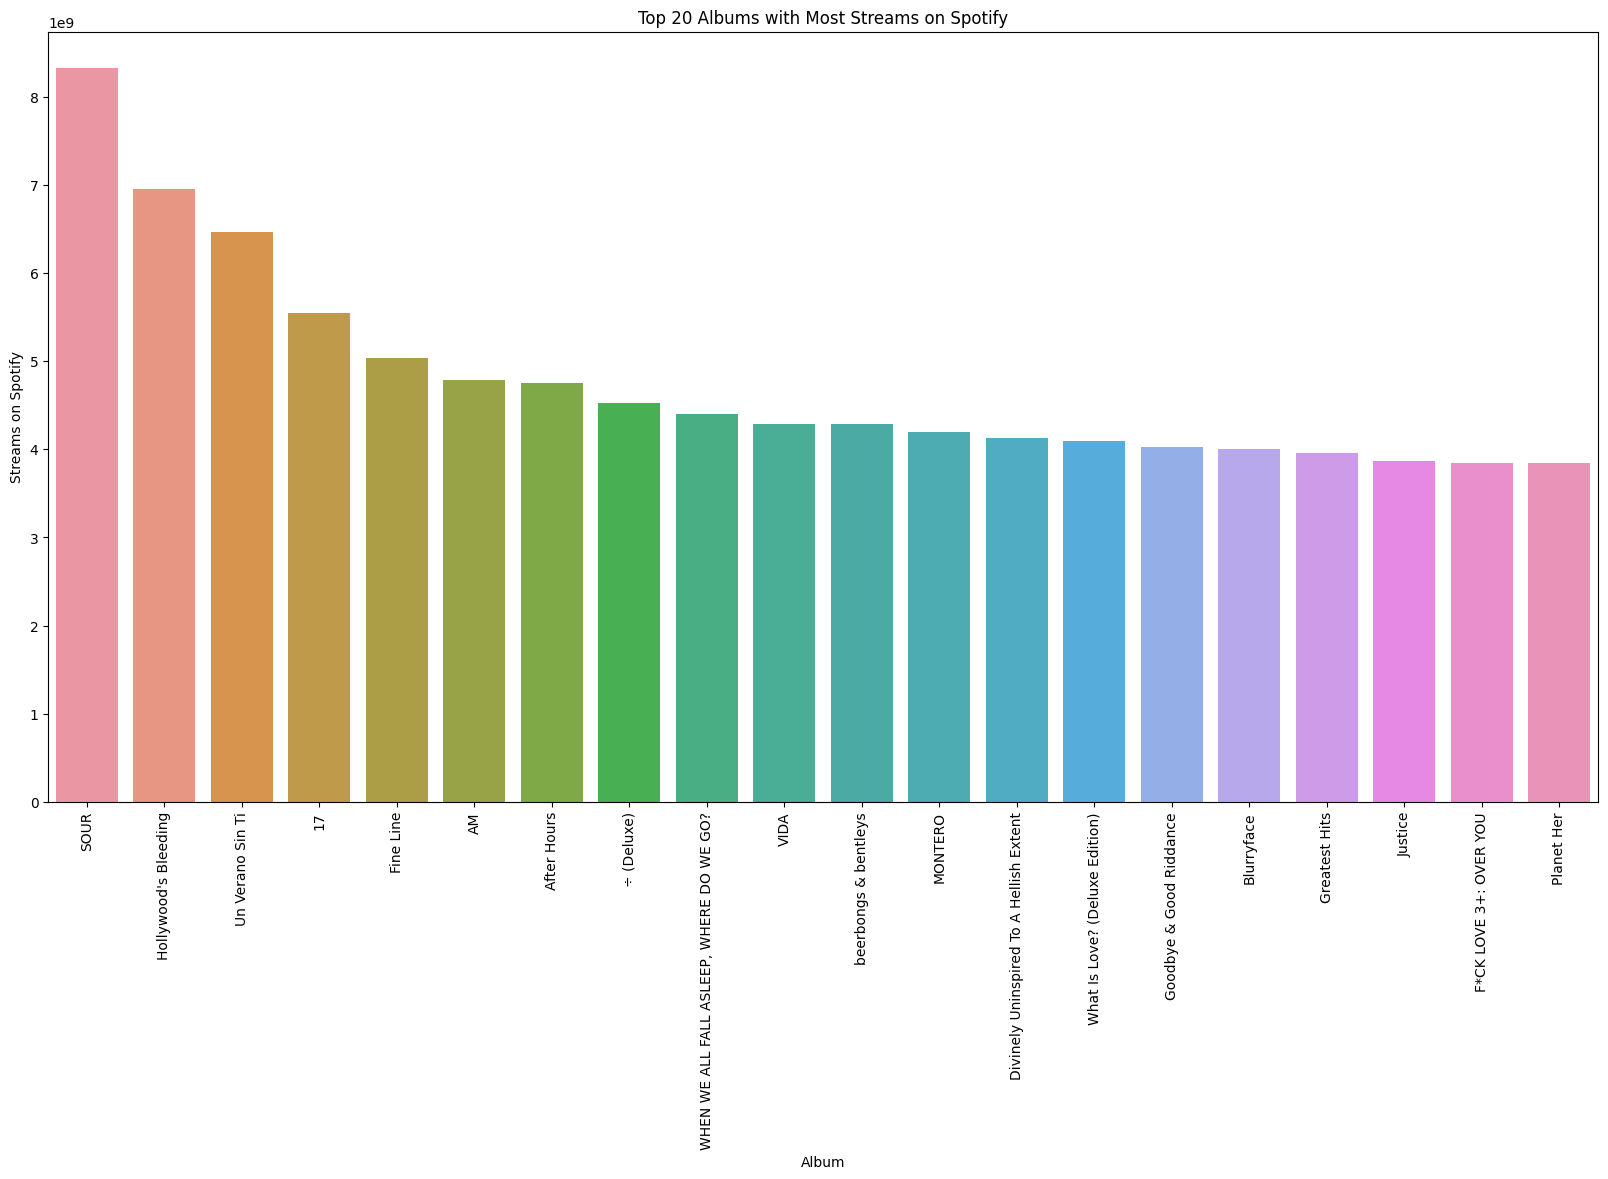

In [12]:
top_20_albums_on_spotify = df[['Track', 'Album', 'Stream']]
top_20_albums_on_spotify = top_20_albums_on_spotify.drop_duplicates(subset=['Track'], keep='first')
top_20_albums_on_spotify = top_20_albums_on_spotify.drop(['Track'], axis=1)

top_20_albums_on_spotify = top_20_albums_on_spotify.groupby('Album').sum()
top_20_albums_on_spotify = top_20_albums_on_spotify.sort_values(by=['Stream'], ascending=False)
top_20_albums_on_spotify = top_20_albums_on_spotify.head(20)

#plot the top 20 albums with most streams
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_albums_on_spotify.index, y='Stream', data = top_20_albums_on_spotify)
plt.xticks(rotation=90)
plt.ylabel('Streams on Spotify')
plt.title('Top 20 Albums with Most Streams on Spotify')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


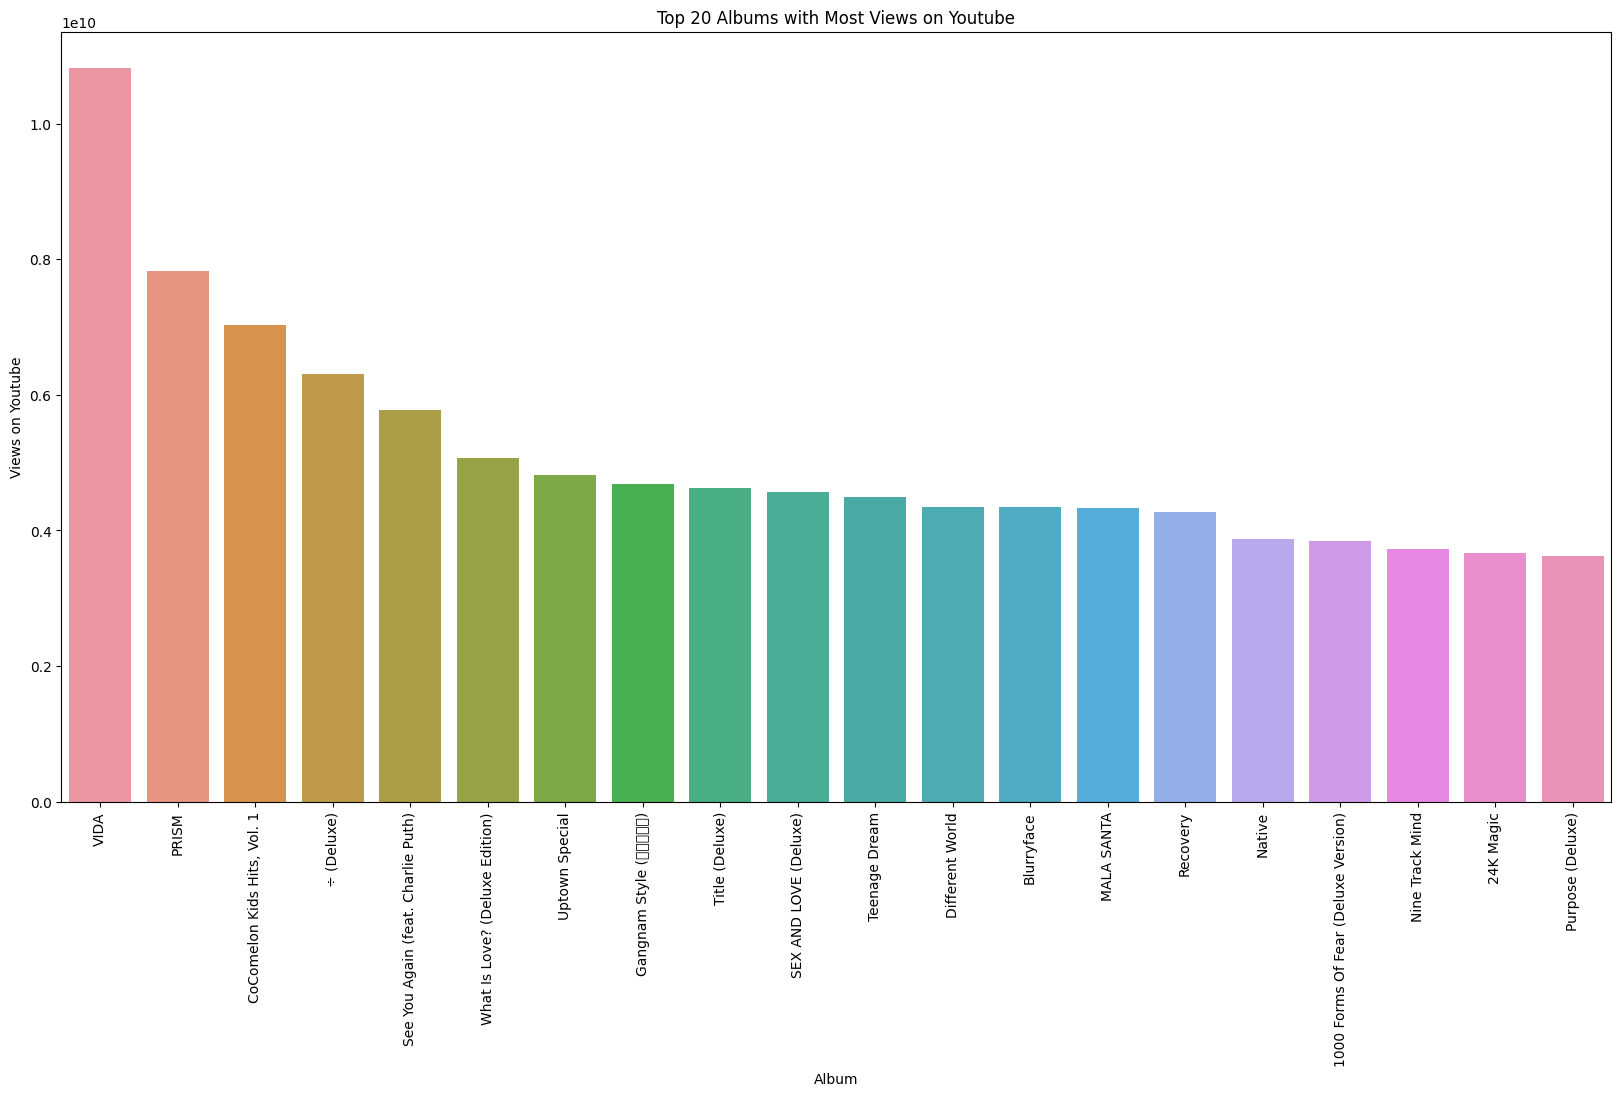

In [13]:
top_20_albums_on_youtube = df[['Track', 'Album', 'Views']]
top_20_albums_on_youtube = top_20_albums_on_youtube.drop_duplicates(subset=['Track'], keep='first')
top_20_albums_on_youtube = top_20_albums_on_youtube.drop(['Track'], axis=1)

top_20_albums_on_youtube = top_20_albums_on_youtube.groupby('Album').sum()
top_20_albums_on_youtube = top_20_albums_on_youtube.sort_values(by=['Views'], ascending=False)
top_20_albums_on_youtube = top_20_albums_on_youtube.head(20)

#plot the top 20 albums with most views
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_albums_on_youtube.index, y='Views', data = top_20_albums_on_youtube)
plt.xticks(rotation=90)
plt.ylabel('Views on Youtube')
plt.title('Top 20 Albums with Most Views on Youtube')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig

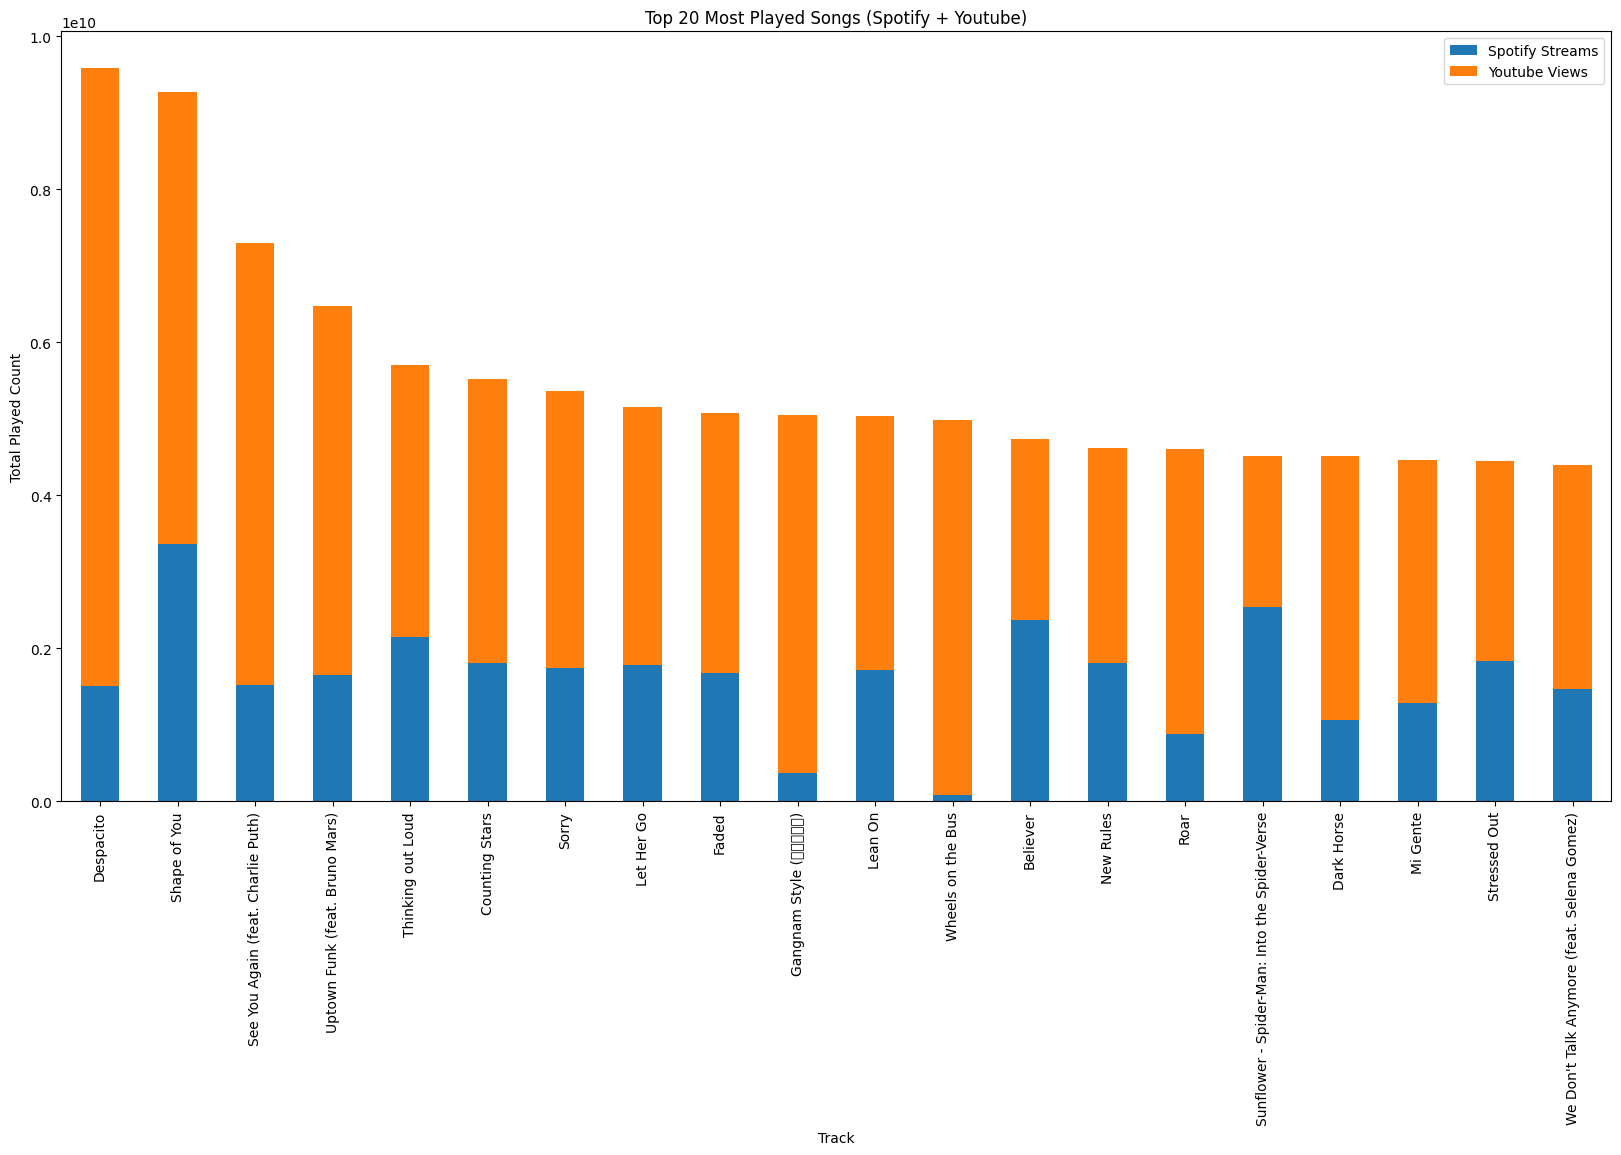

In [14]:
top_20_most_played_songs = df[['Track', 'Stream', 'Views']]

#delete rows with same track name
top_20_most_played_songs = top_20_most_played_songs.drop_duplicates(subset=['Track'], keep='first')

top_20_most_played_songs['total_played'] = top_20_most_played_songs['Stream'] + top_20_most_played_songs['Views']

#sort the top_20_most_played_songsframe by total_played and find the top 20 songs
top_20_most_played_songs = top_20_most_played_songs.sort_values(by=['total_played'], ascending=False)
top_20_most_played_songs = top_20_most_played_songs.head(20)

#create a stacked bar plot for the top 20 songs with x axis as track name and y axis as total_played
top_20_most_played_songs.plot.bar(x='Track', y=['Stream', 'Views'], stacked=True, figsize=(20,10), title='Top 20 Most Played Songs (Spotify + Youtube)')
plt.ylabel('Total Played Count')
plt.legend(['Spotify Streams', 'Youtube Views'])


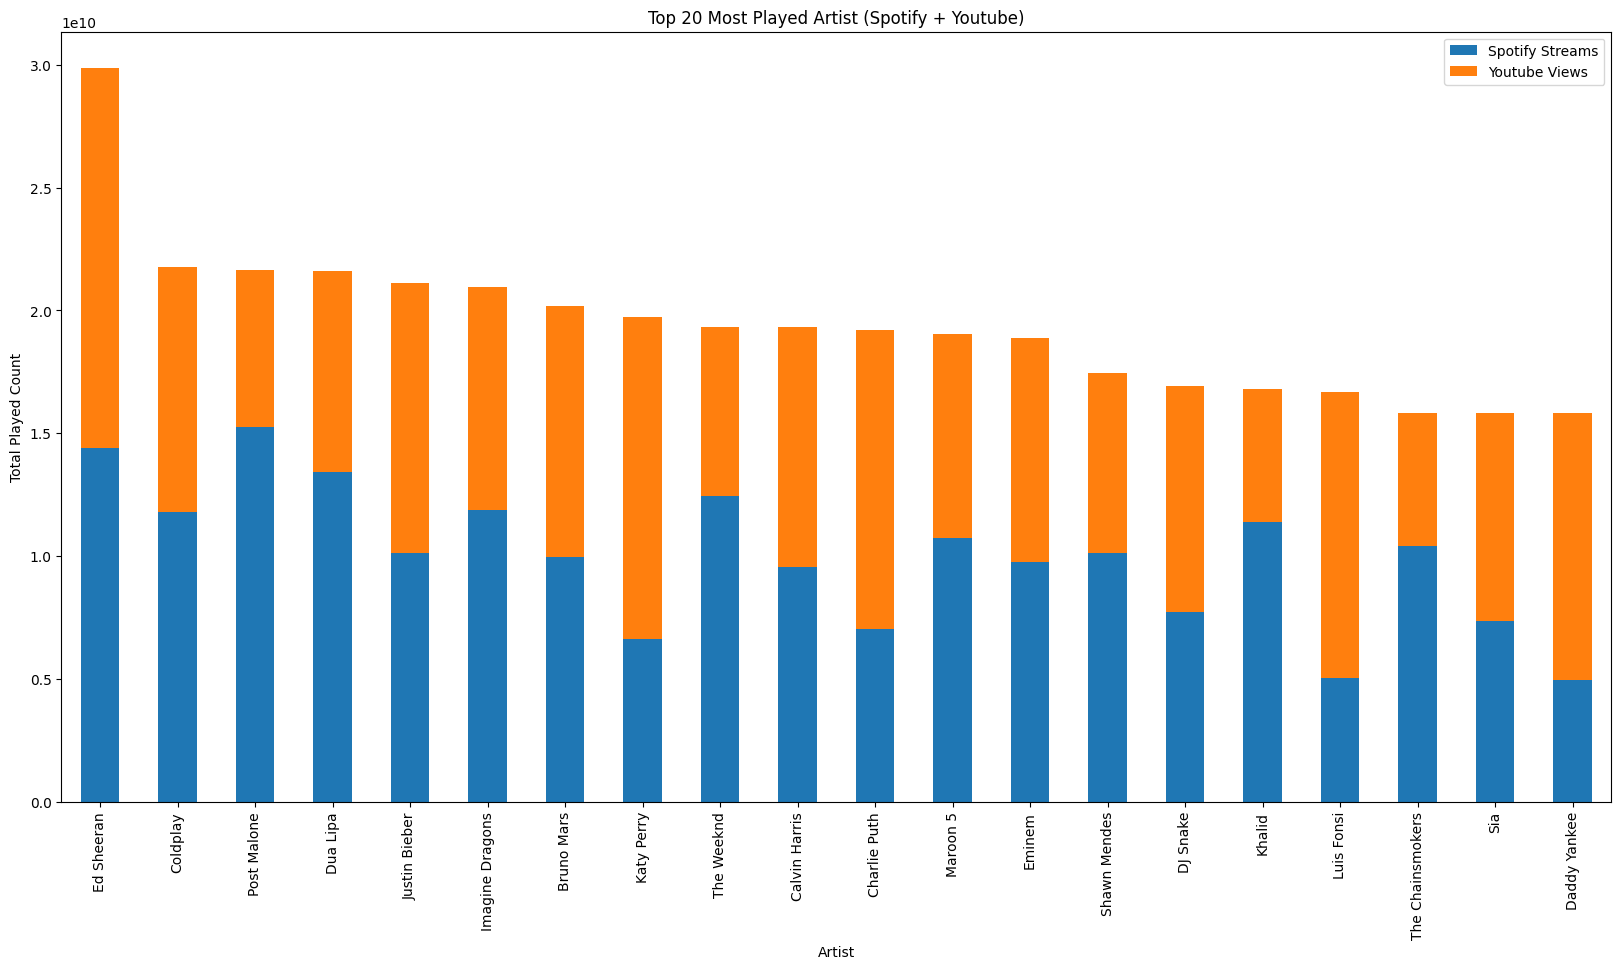

In [15]:
top_20_most_played_artists = df[['Artist', 'Stream', 'Views']].groupby('Artist').sum()
top_20_most_played_artists['total_played'] = top_20_most_played_artists['Stream'] + top_20_most_played_artists['Views']

#reset index to make Artist a column
top_20_most_played_artists = top_20_most_played_artists.reset_index()

top_20_most_played_artists = top_20_most_played_artists.sort_values(by=['total_played'], ascending=False)
top_20_most_played_artists = top_20_most_played_artists.head(20)

top_20_most_played_artists.plot.bar(x='Artist', y=['Stream', 'Views'], stacked=True, figsize=(20,10), title='Top 20 Most Played Artist (Spotify + Youtube)')
plt.ylabel('Total Played Count')
plt.legend(['Spotify Streams', 'Youtube Views'])


In [16]:
#isko change karna hai

# #create a new data frame sorted on the basis of views
# df_views = df.sort_values(by=['Views'], ascending=False)

# #find the top 20 songs with most views
# df_views = df_views.head(20)

# #plot a grouped bar chart for views, likes and comments for each song
# df_views.plot.bar(x='Track', y=['Views', 'Likes', 'Comments'], figsize=(20,10), title='Top 20 Songs with Views, Likes and Comments')

# #create the legend
# plt.legend(loc='upper right')

# #label y axis as count
# plt.ylabel('Count')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig

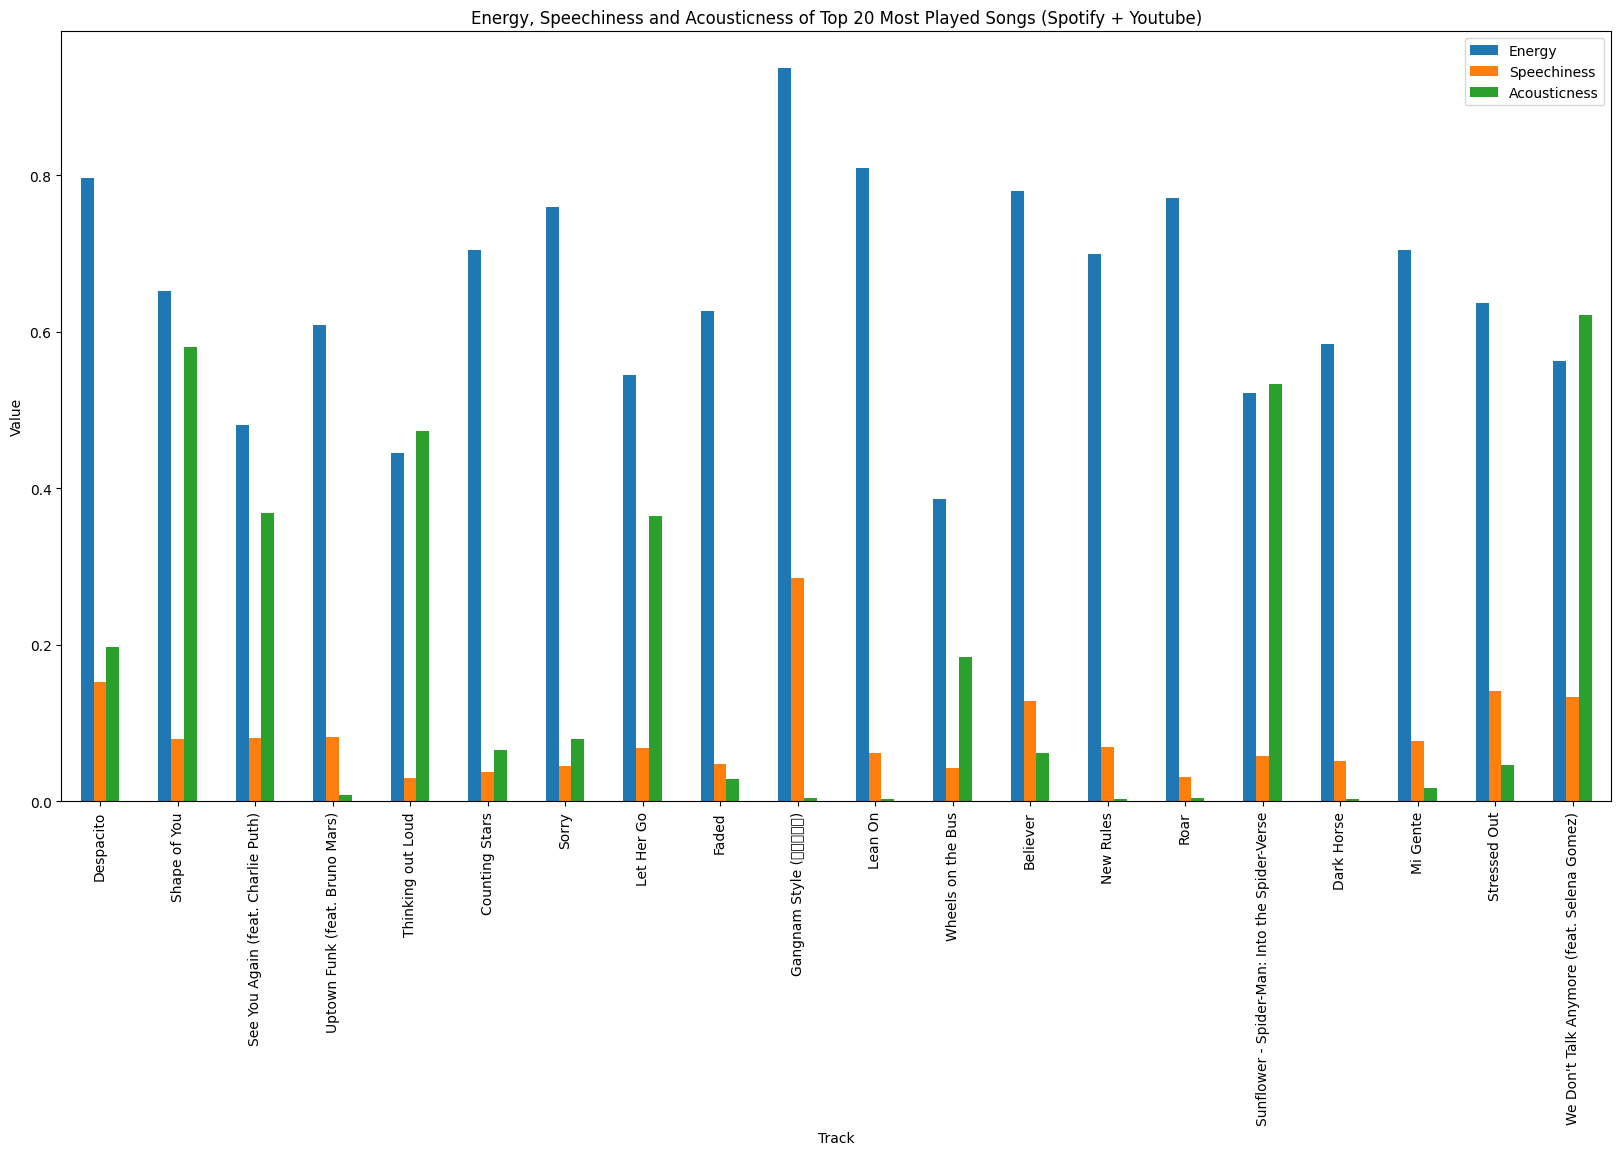

In [17]:
top_20_most_played_songs = df[['Track', 'Stream', 'Views', 'Energy', 'Speechiness', 'Acousticness', 'Valence', 'Danceability']]

top_20_most_played_songs = top_20_most_played_songs.drop_duplicates(subset=['Track'], keep='first')

top_20_most_played_songs['total_played'] = top_20_most_played_songs['Stream'] + top_20_most_played_songs['Views']

top_20_most_played_songs = top_20_most_played_songs.drop(['Stream', 'Views'], axis=1)

#sort the top_20_most_played_songsframe by total_played and find the top 20 songs
top_20_most_played_songs = top_20_most_played_songs.sort_values(by=['total_played'], ascending=False)
top_20_most_played_songs = top_20_most_played_songs.head(20)

top_20_most_played_songs.plot.bar(x='Track', y=['Energy', 'Speechiness', 'Acousticness'], figsize=(20,10), title='Energy, Speechiness and Acousticness of Top 20 Most Played Songs (Spotify + Youtube)')
plt.ylabel('Value')
plt.legend(['Energy', 'Speechiness', 'Acousticness'])


            Artist  Energy  Speechiness  Acousticness  Valence  Danceability  \
0         Gorillaz   0.705       0.1770      0.008360   0.7720         0.818   
1         Gorillaz   0.703       0.0302      0.086900   0.8520         0.676   
2         Gorillaz   0.923       0.0522      0.042500   0.5510         0.695   
3         Gorillaz   0.739       0.0260      0.000015   0.5780         0.689   
4         Gorillaz   0.694       0.1710      0.025300   0.5250         0.663   
...            ...     ...          ...           ...      ...           ...   
20713  SICK LEGEND   0.926       0.0328      0.448000   0.6580         0.582   
20714  SICK LEGEND   0.936       0.1370      0.028000   0.6570         0.531   
20715  SICK LEGEND   0.830       0.0647      0.024300   0.4190         0.443   
20716  SICK LEGEND   0.767       0.4190      0.356000   0.5390         0.417   
20717  SICK LEGEND   0.938       0.1070      0.002770   0.0787         0.498   

       total_played  
0      1.733790e+

<ipython-input-18-3c044ff96f9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_most_played_artists['total_played'] = top_20_most_played_artists['Stream'] + top_20_most_played_artists['Views']


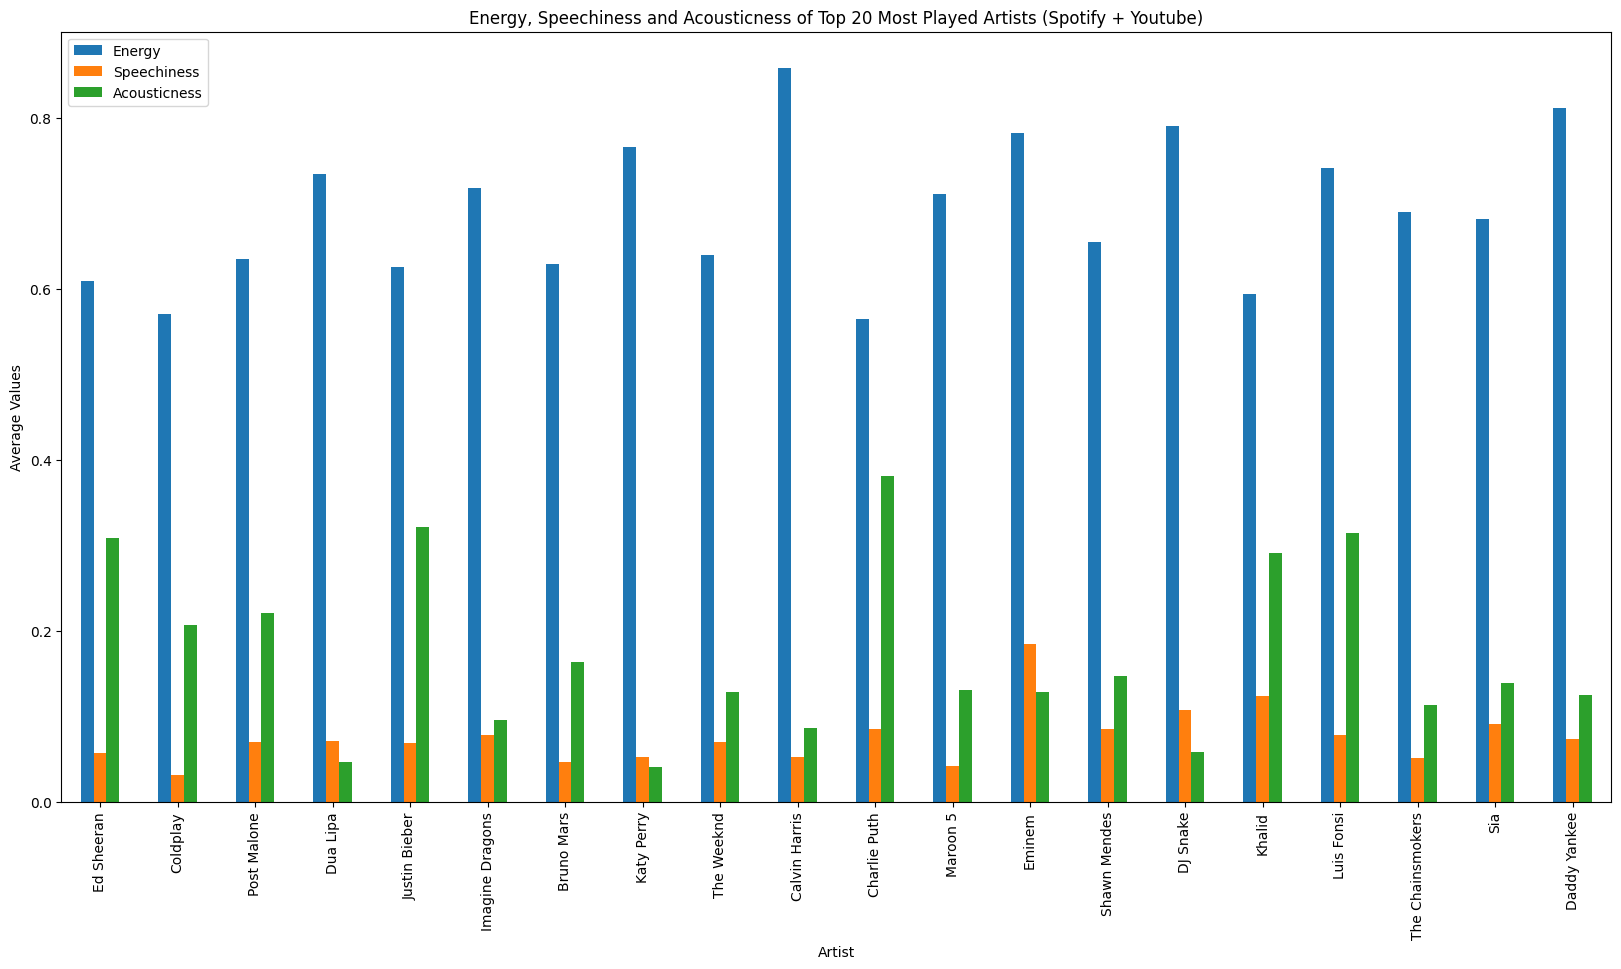

In [18]:
top_20_most_played_artists = df[['Artist', 'Stream', 'Views', 'Energy', 'Speechiness', 'Acousticness', 'Valence', 'Danceability']]
top_20_most_played_artists['total_played'] = top_20_most_played_artists['Stream'] + top_20_most_played_artists['Views']
top_20_most_played_artists = top_20_most_played_artists.drop(['Stream', 'Views'], axis=1)
print(top_20_most_played_artists)
#groupby artist and sum the total_played and mean of energy, speechiness and acousticness
top_20_most_played_artists = top_20_most_played_artists.groupby('Artist').agg({'total_played': 'sum', 'Valence': 'mean', 'Danceability': 'mean', 'Energy': 'mean', 'Speechiness': 'mean', 'Acousticness': 'mean'})
top_20_most_played_artists = top_20_most_played_artists.sort_values(by=['total_played'], ascending=False)
top_20_most_played_artists = top_20_most_played_artists.head(20)
top_20_most_played_artists = top_20_most_played_artists.reset_index()
top_20_most_played_artists.plot.bar(x='Artist', y=['Energy', 'Speechiness', 'Acousticness'], figsize=(20,10), title='Energy, Speechiness and Acousticness of Top 20 Most Played Artists (Spotify + Youtube)')
plt.ylabel('Average Values')
plt.legend(['Energy', 'Speechiness', 'Acousticness'])

plt.legend(loc='upper left')


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig

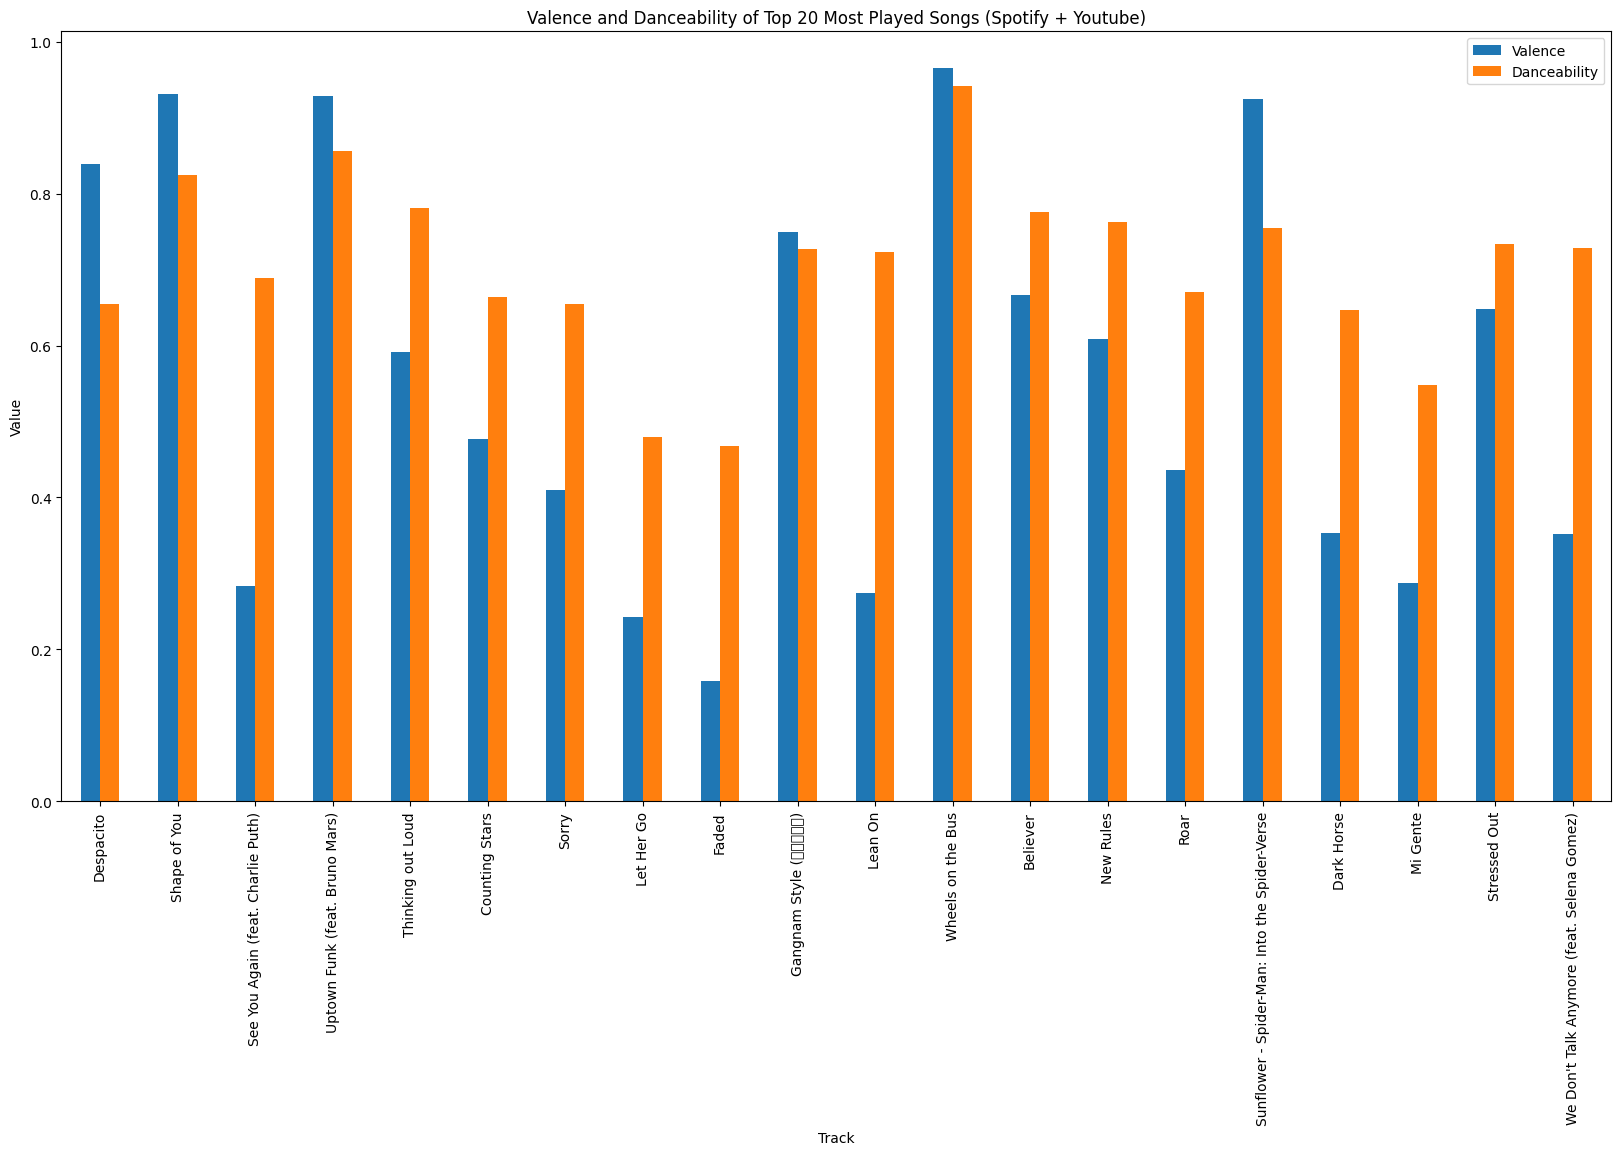

In [19]:
top_20_most_played_songs.plot.bar(x='Track', y=['Valence', 'Danceability'], figsize=(20,10), title='Valence and Danceability of Top 20 Most Played Songs (Spotify + Youtube)')
plt.ylabel('Value')
plt.legend(['Valence', 'Danceability'])

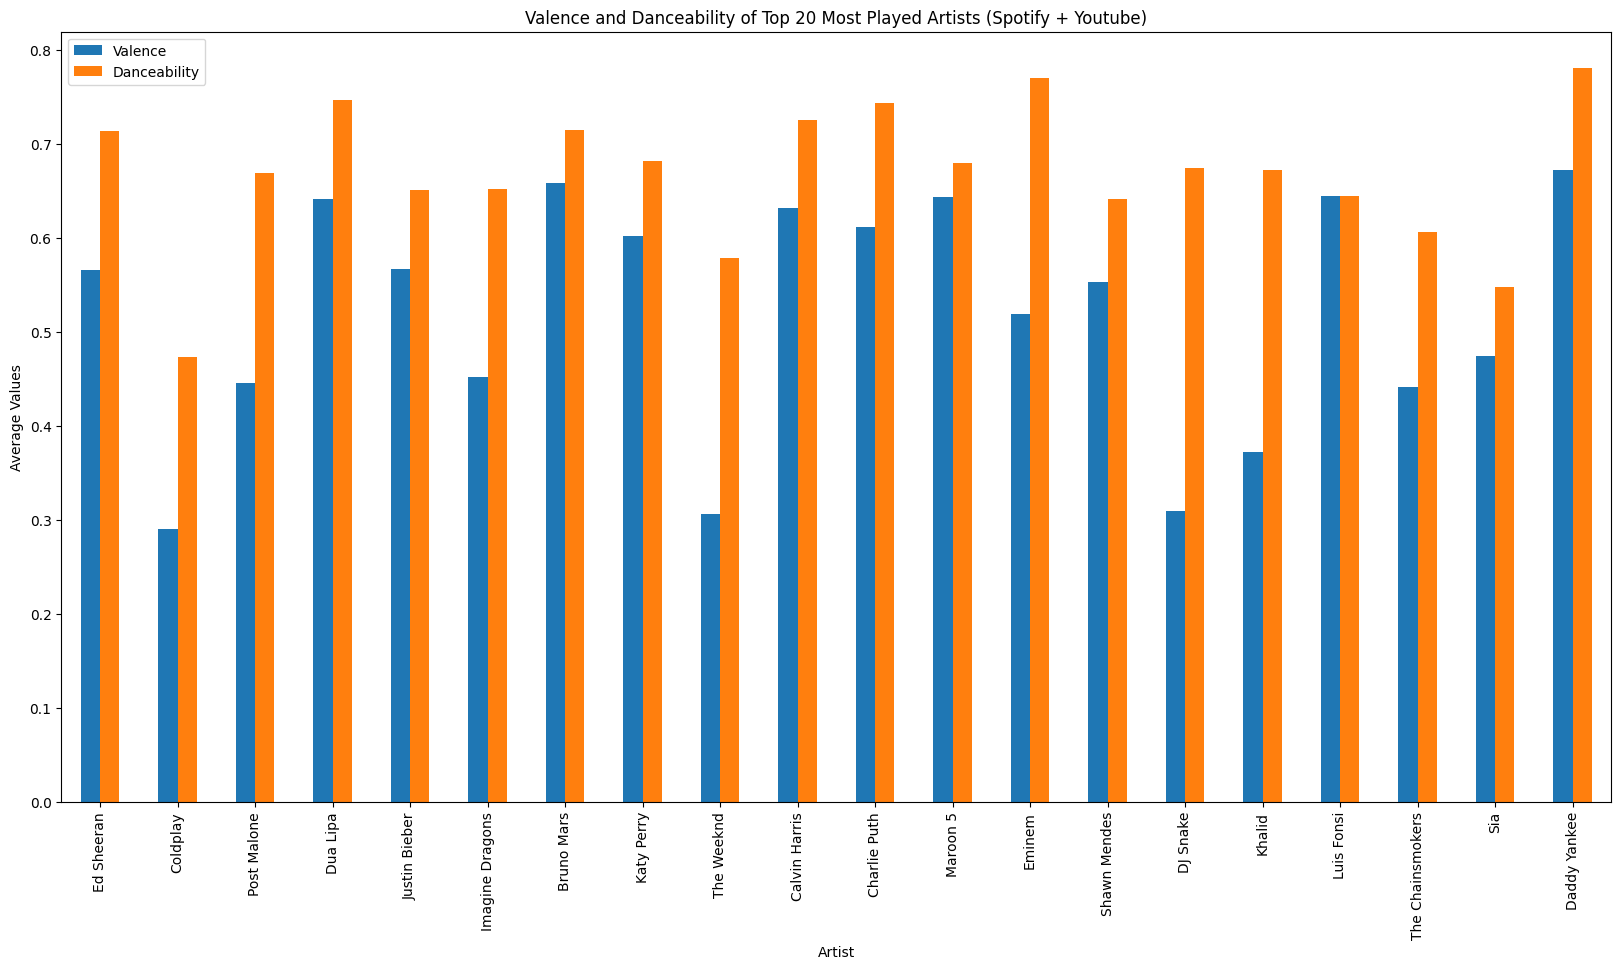

In [20]:
top_20_most_played_artists.plot.bar(x='Artist', y=['Valence', 'Danceability'], figsize=(20,10), title='Valence and Danceability of Top 20 Most Played Artists (Spotify + Youtube)')
plt.ylabel('Average Values')
plt.legend(['Valence', 'Danceability'])

In [21]:
# #group the data by artists and take average
# grouped_views = df.groupby('Artist').mean()

# #reset index as artist
# grouped_views = grouped_views.reset_index()

# #sort the dataframe by views and find the top 20 artists
# grouped_views = grouped_views.sort_values(by=['Views'], ascending=False)
# grouped_views = grouped_views.head(20)

# #plot a grouped bar chart for Energy, Valence and Danceability for each artist
# grouped_views.plot.bar(x='Artist', y=['Energy', 'Valence', 'Danceability'], figsize=(20,10), title='Top 20 Artists with Energy, Danceability and Valence')

# #create the legend
# plt.legend(loc='upper right')






<ipython-input-22-f7492e84c0da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs['Total_Played'] = df_songs['Stream'] + df_songs['Views']


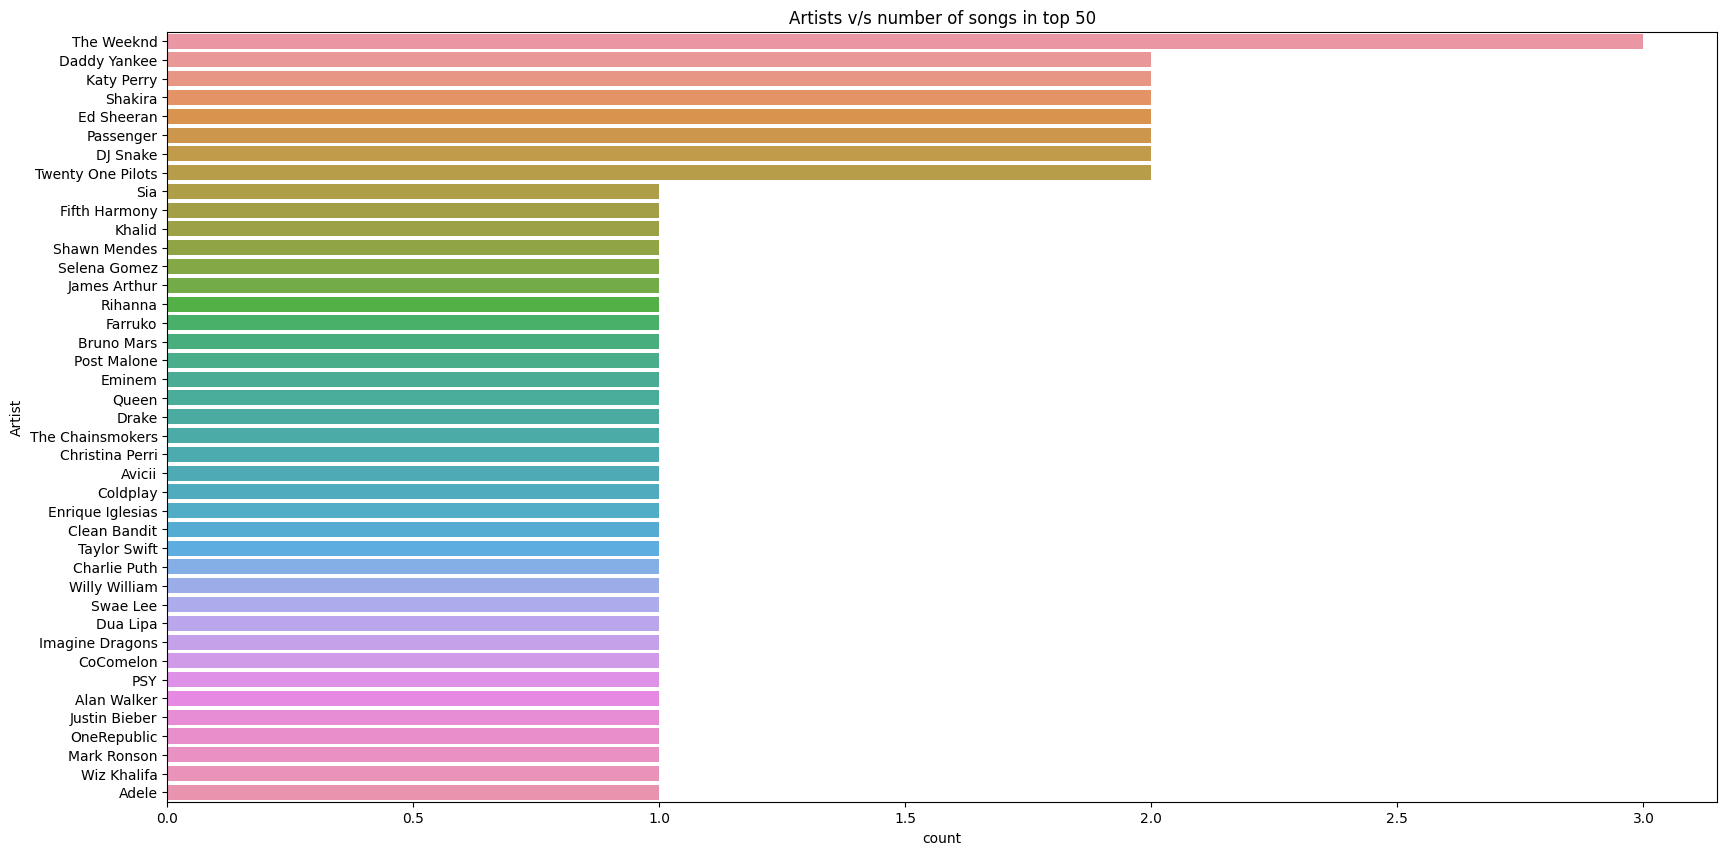

In [22]:
#NEW
df_songs = df.drop_duplicates(subset=['Track'], keep='first')

#create a total_plyaed column with sum of Stream and Views
df_songs['Total_Played'] = df_songs['Stream'] + df_songs['Views']

#sort the dataframe by Total_Played in descending order
df_songs = df_songs.sort_values(by=['Total_Played'], ascending=False)


#extract the top 50 songs
df_songs = df_songs.head(50)

#plot a graph for Artist
plt.figure(figsize=(20,10))
sns.countplot(y='Artist', data=df_songs, order=df_songs['Artist'].value_counts().index)
plt.title('Artists v/s number of songs in top 50')
plt.show()

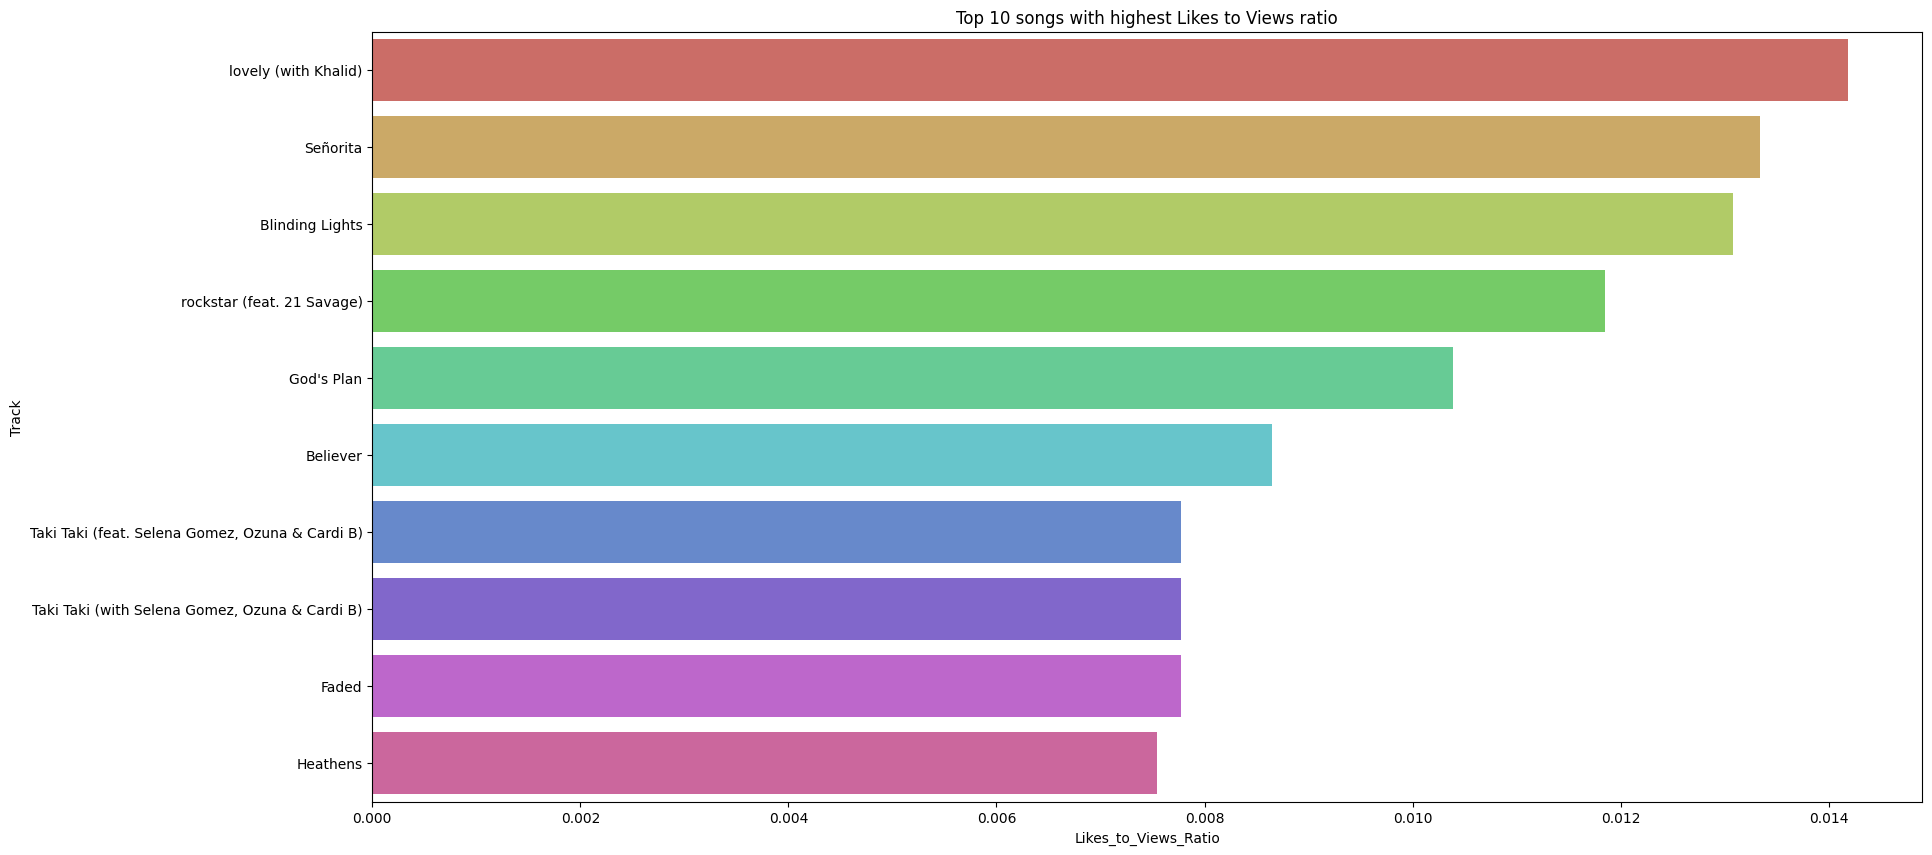

In [23]:
#find Likes to Views ratio
df_songs['Likes_to_Views_Ratio'] = df_songs['Likes'] / df_songs['Views']

#Find the top 10 songs with highest Likes to Views ratio
df_10 = df_songs.sort_values(by=['Likes_to_Views_Ratio'], ascending=False)
df_10 = df_10.head(10)

#plot a graph for df_10
plt.figure(figsize=(20,10))
#find the hues for the graph
colors = sns.color_palette("hls", 10)
sns.barplot(x='Likes_to_Views_Ratio', y='Track', data=df_10, palette=colors)
plt.title('Top 10 songs with highest Likes to Views ratio')
plt.show()


In [24]:

#remove rows with duplicate song names
data_songs = df.drop_duplicates(subset=['Track'], keep='first')

#extract Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms from dataframe data_songs
data_songs = data_songs[['Loudness', 'Speechiness', 'Acousticness', 'Energy', 'Tempo', 'Instrumentalness', 'Duration_ms']]

In [25]:
#find mean for all columns in data_songs
data_songs_mean = data_songs.mean()

#print the mean
print("Mean of Population for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(data_songs_mean)

Mean of Population for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness                -7.659451
Speechiness              0.094387
Acousticness             0.286431
Energy                   0.636366
Tempo                  120.691649
Instrumentalness         0.056693
Duration_ms         222724.736387
dtype: float64


In [26]:
#find variance for all columns in data_songs
data_songs_variance = data_songs.var()

#print the variance
print("Variance of Population for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(data_songs_variance)

Variance of Population for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness            2.148004e+01
Speechiness         1.119639e-02
Acousticness        8.257605e-02
Energy              4.624574e-02
Tempo               8.798444e+02
Instrumentalness    3.759209e-02
Duration_ms         8.712616e+09
dtype: float64


In [27]:
#find standard deviation for all columns in data_songs
data_songs_std = data_songs.std()

#print the standard deviation
print("Standard Deviation of Population for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(data_songs_std)

Standard Deviation of Population for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness                4.634657
Speechiness             0.105813
Acousticness            0.287360
Energy                  0.215048
Tempo                  29.662171
Instrumentalness        0.193887
Duration_ms         93341.395617
dtype: float64


In [28]:
#perform random sampling of size 1000 from data_songs
data_songs_random_sample = data_songs.sample(n=1000).sort_index()

#find mean for all columns in data_songs_sample
data_songs_random_sample_mean = data_songs_random_sample.mean()

#print the mean
print("Mean of Sample for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(data_songs_random_sample_mean)

#find sampling error for all columns in data_songs_sample
data_songs_random_sample_error = data_songs_random_sample_mean - data_songs_mean

#abolute sampling error
data_songs_random_sample_error = abs(data_songs_random_sample_error)

print("######################################### Sampling Error #########################################")
#print the sampling error
print("Sampling Error(Random Sampling) for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(data_songs_random_sample_error)


Mean of Sample for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness                -7.756289
Speechiness              0.098544
Acousticness             0.282884
Energy                   0.629745
Tempo                  121.378184
Instrumentalness         0.068586
Duration_ms         224453.461000
dtype: float64
######################################### Sampling Error #########################################
Sampling Error(Random Sampling) for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness               0.096838
Speechiness            0.004157
Acousticness           0.003547
Energy                 0.006621
Tempo                  0.686535
Instrumentalness       0.011894
Duration_ms         1728.724613
dtype: float64


In [29]:
#perform systematic sampling of size 1000 from data_songs
def systematic_sampling(df, step):

    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(data_songs, (data_songs.shape[0]//1000))

#find mean for all columns in systematic_sample
systematic_sample_mean = systematic_sample.mean()

#print the mean
print("Mean of Systematic Sample for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(systematic_sample_mean)

#find sampling error for all columns in systematic_sample
systematic_sample_error = systematic_sample_mean - data_songs_mean

#abolute sampling error
systematic_sample_error = abs(systematic_sample_error)

print("######################################### Sampling Error #########################################")
#print the sampling error
print("Sampling Error(Systematic Sampling) for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: ")
print(systematic_sample_error)


Mean of Systematic Sample for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness                -7.694228
Speechiness              0.094503
Acousticness             0.277845
Energy                   0.636069
Tempo                  121.479746
Instrumentalness         0.052957
Duration_ms         221179.188406
dtype: float64
######################################### Sampling Error #########################################
Sampling Error(Systematic Sampling) for Loudness, Speechiness, Acousticness, Energy, Tempo, Instrumentalness, Duration_ms are: 
Loudness               0.034777
Speechiness            0.000116
Acousticness           0.008586
Energy                 0.000297
Tempo                  0.788097
Instrumentalness       0.003736
Duration_ms         1545.547981
dtype: float64


In [30]:
#create a 1-d array with Tempo values from data_songs
tempo = data_songs['Tempo'].to_numpy()
tempo

array([138.559,  92.761, 108.014, ..., 168.388, 155.378, 160.067])

Standard Error:  0.029983802823952303


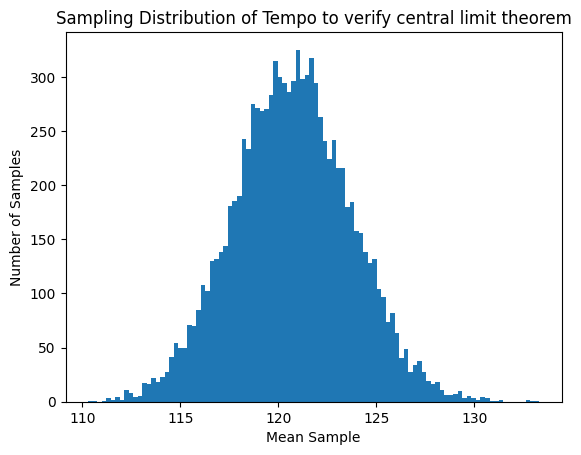

In [31]:
#Central Limit Theorem
number_of_samples=10000 #R
size_of_sample=100 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(tempo,size_of_sample,replace=False)))
#sample_mean

_=plt.hist(sample_mean,bins=100)
#label the axes
_=plt.ylabel('Number of Samples')
_=plt.xlabel('Mean Sample')
#label the figure
_=plt.title('Sampling Distribution of Tempo to verify central limit theorem')
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
#print standard error
print("Standard Error: ",standard_error)

Standard Error:  0.029620939254376446


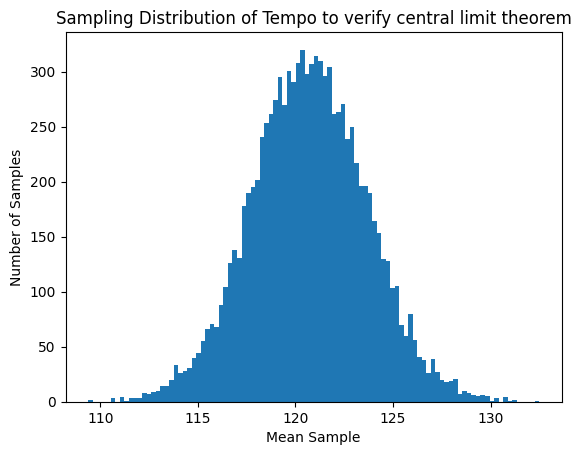

In [32]:
#Bootstrap Sampling
number_of_samples=10000 #R
size_of_sample=100 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(tempo,size_of_sample,replace=True)))
#sample_mean

_=plt.hist(sample_mean,bins=100)
#label the axes
_=plt.ylabel('Number of Samples')
_=plt.xlabel('Mean Sample')
#label the figure
_=plt.title('Sampling Distribution of Tempo to verify central limit theorem')
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
#print standard error
print("Standard Error: ",standard_error)

In [33]:
#Confidence Interval for Tempo after Bootstrap Sampling
CI=0.95
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 114.88539999999999
Upper level : 126.58779
